In [4]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Разминка (4 балла)

## 1.1 Создание матриц (0.25 балла)

Создайте 4 матрицы
- A - "шахматную" из нулей и единиц, размера 6 на 3, левое верхнее значение (A[0][0]) равно 1,
- В - из чисел от 1 до 24, записанных в виде змейки, размера 6 на 4,
- C - из случайных целых чисел от 2 до 10 (обе границы включительно), размера 4 на 3
- D - из нулей с единичками на главной диагонали, размера 4 на 4.

**Создайте из этих матриц "лоскутную" матрицу S**

A В

С D

используя **только стандартные** операции numpy. Comprehensions использовать нельзя.

После этого допишите к полученной матрице S матрицу F размера 10 на 2 из нулей, чтобы получилась матрица G:

S F

P.S. Когда мы говорим, что матрица имеет размер x на y, x - количество строк, y - количество столбцов.

In [ ]:
import numpy as np

A = np.ones((6 , 3), dtype=int)
A[::2, 1::2] = 0
A[1::2, ::2] = 0

B = np.arange(1, 25).reshape(6, 4)
B[1::2] = B[1::2, ::-1]

C = np.random.randint(2, 11, size=(4,3))

D = np.eye(4,4, dtype=int)
hor1 = np.hstack((A, B))
hor2 = np.hstack((C, D))
S = np.vstack((hor1, hor2))
F = np.zeros((10,2), dtype=int)
G = np.hstack((S, F))
G

array([[ 1,  0,  1,  1,  2,  3,  4,  0,  0],
       [ 0,  1,  0,  8,  7,  6,  5,  0,  0],
       [ 1,  0,  1,  9, 10, 11, 12,  0,  0],
       [ 0,  1,  0, 16, 15, 14, 13,  0,  0],
       [ 1,  0,  1, 17, 18, 19, 20,  0,  0],
       [ 0,  1,  0, 24, 23, 22, 21,  0,  0],
       [ 4, 10,  7,  1,  0,  0,  0,  0,  0],
       [ 3,  6,  9,  0,  1,  0,  0,  0,  0],
       [ 5,  5,  2,  0,  0,  1,  0,  0,  0],
       [ 6,  9,  9,  0,  0,  0,  1,  0,  0]])

## 1.2 Поиск ближайшего соседа (0.25 балла)

Реализуйте функцию, принимающую на вход матрицу X и некоторое число a и возвращающую ближайший к числу элемент матрицы.
Например, для X = np.arange(0,10).reshape((2, 5)) и a = 3.6 ответом будет 4. Можно пользоваться только базовыми функциями numpy, циклами пользоваться **нельзя**.

In [5]:
def find_nearest_neighbour(X, a):
    diff = np.abs(X - a)
    return X.reshape(-1)[np.argmin(diff)]

X = np.arange(0,10).reshape((2, 5))
X[1, 4] = 15
a = 3.6
find_nearest_neighbour(X, a)

4

## 1.3 Очень странная нейросеть (0.25 балла)

Реализуйте одну очень странную нейросеть. Нейросеть должна:

- Возводить матрицу A (матрицу весов) размера N x N в квадрат
- В качестве первого преобразования умножать вектор X длины N (вектор признаков) на матрицу весов A**2 (на выходе получается новый вектор);
- В качестве второго преобразования умножать вектор, полученный на прошлом шаге, на вектор b (вектор весов) размера N (на выходе получается скалярное число).

Считаем, что все числа (элементы матриц и векторов) - числа с плавающей точкой.

In [6]:
A = np.arange(0, 16).reshape(4, 4)
b = np.arange(0, 4).reshape(1, 4)
X = np.arange(0, 4).reshape(4, 1)

def very_strange_neural_network(A, b, X):
    A = A @ A
    X = A @ X
    b = b @ X
    return b

print(very_strange_neural_network(A, b, X))

[[13720]]


## 1.4 Джунгли зовут! (0.25 балла)

Перед вами матрица M - карта местности тяжелопроходимых джунглей, составленная Ларой Крофт. На карте каждая ячейка - целое число, обозначающее высоту над уровнем моря (если число больше нуля) в метрах или глубину моря (если число меньше нуля) в метрах в данной ячейке карты размером метр на метр. Если число 0, то это часть суши - берег.


Вам необходимо посчитать:
- Общую площадь клеточек моря, в которых его глубина больше 5 (в м^2)
- Общий объём всей воды на карте (в м^3)
- Максимальную высоту над уровнем моря, которая есть на этой карте (в м)

In [8]:
def find_deep_sea_area(M):
    A = (M < -5).sum()
    return A

def find_water_volume(M):
    A = M[(M < 0)].sum()
    return -A

def find_max_height(M):
    A = M.max()
    return A

In [9]:
# Можно подставить свой пример
M = np.array([
    [-7, -3, -1, 0],
    [-4, -3, 1, 19],
    [-2, 0, 4, 25],
    [-1, 3, 6, 9]
])

# простая проверка для примера выше
assert np.isclose(find_deep_sea_area(M), 1)
assert np.isclose(find_water_volume(M), 21)
assert np.isclose(find_max_height(M), 25)

print("Общая площадь моря на карте -", find_deep_sea_area(M), "м^2")
print("Общий объем воды на карте -", find_water_volume(M), "м^3")
print("Максимальный уровень над уровнем моря на карте -", find_max_height(M), "м")

Общая площадь моря на карте - 1 м^2
Общий объем воды на карте - 21 м^3
Максимальный уровень над уровнем моря на карте - 25 м


## 1.5 Острова сокровищ (0.25 балла)


На вход функции подаётся массив a из нулей и единиц. Необходимо посчитать, сколько в массиве есть блоков из идущих подряд единиц (островков). Можно пользоваться только базовыми функциями numpy, циклами пользоваться **нельзя**.

Подсказка: посмотрите, что такое `np.diff`

In [10]:
def count_all_islands(a):
    b = np.insert(a, len(a) - 1, 0)
    c = np.insert(b, 0, 0)
    A = (abs(np.diff(c)).sum()) // 2
    return A

In [11]:
# можно подставить свой пример

a = np.array([0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1])

# простая проверка для примера выше
assert count_all_islands(a) == 4
print(count_all_islands(a))

4


## 1.6 Маскарад (0.25 балла)

На вход идёт 2-мерная матрица X, заполненная числами с плавающей точкой, и дробное число a. Нужно заменить все ячейки в матрице, которые больше, чем а, на среднее значение среди элементов матрицы Х.

**Нужно** пользоваться базовыми функциями numpy, **нельзя** пользоваться циклами.

In [14]:
def swap_mask_for_average(X, a):
  elem = int(X.mean())
  A = np.where(X > a, elem, X)
  return A

In [15]:
# Можно подставить свой пример
M = np.array([
    [-7, -3, -1, 0],
    [-4, -3, 1, 19],
    [-2, 0, 4, 25],
    [-1, 3, 6, 9]
])
a = 5

# простая проверка для примера выше
assert np.allclose(swap_mask_for_average(M, a),
                   np.array([
                       [-7, -3, -1, 0],
                       [-4, -3, 1, 2],
                       [-2, 0, 4, 2],
                       [-1, 3, 2, 2]
                   ]))

swap_mask_for_average(M, a)

array([[-7, -3, -1,  0],
       [-4, -3,  1,  2],
       [-2,  0,  4,  2],
       [-1,  3,  2,  2]])

## 1.7 По горячим трейсам (0.25 балла)

На вход приходит квадратная матрица М, надо посчитать разницу между суммой по главной и побочной диагоналями матрицы.


Можно пользоваться только базовыми функциями numpy, циклами пользоваться **нельзя**.

Подсказка: посмотрите, что такое `np.trace`

In [16]:
def count_trace_diff(M):
    new_M = M[::, ::-1]
    return np.trace(M) - np.trace(new_M)

In [17]:
# Можно подставить свой пример
M = np.array([
    [-7, -3, -1, 0],
    [-4, -3, 1, 19],
    [-2, 0, 4, 25],
    [-1, 3, 6, 9]
])

# простая проверка для примера выше
assert np.allclose(count_trace_diff(M), 3)

count_trace_diff(M)

3

## 1.8 Царь горы (0.25 балла)

На вход приходит вектор a размера N. Необходимо при помощи сложения, конкатенации, бродкастинга получить симметричную матрицу размера 2N x 2N, у которой в середине максимальное значение, а к краям оно убывает.

Пример: a = (0, 1, 2)

Результат:

0 1 2 2 1 0 \\
1 2 3 3 2 1 \\
2 3 4 4 3 2 \\
2 3 4 4 3 2 \\
1 2 3 3 2 1 \\
0 1 2 2 1 0 \\

In [18]:
def create_mountain(a):
    row = np.concatenate((a, a[::-1]))
    matrix = row[:, None] + row[None, :]
    return matrix

In [19]:
# Можно подставить свой пример
a = np.array([0, 1, 2, 3, 4])

create_mountain(a)

array([[0, 1, 2, 3, 4, 4, 3, 2, 1, 0],
       [1, 2, 3, 4, 5, 5, 4, 3, 2, 1],
       [2, 3, 4, 5, 6, 6, 5, 4, 3, 2],
       [3, 4, 5, 6, 7, 7, 6, 5, 4, 3],
       [4, 5, 6, 7, 8, 8, 7, 6, 5, 4],
       [4, 5, 6, 7, 8, 8, 7, 6, 5, 4],
       [3, 4, 5, 6, 7, 7, 6, 5, 4, 3],
       [2, 3, 4, 5, 6, 6, 5, 4, 3, 2],
       [1, 2, 3, 4, 5, 5, 4, 3, 2, 1],
       [0, 1, 2, 3, 4, 4, 3, 2, 1, 0]])

## 1.9 Монохромная фотография 9 на 12 (0.5 балла)

На вход приходит двухмерная матрица P размера N на M, заполненная числами от 0 до 255, соответствующая некой черно-белой фотографии и натуральное число C. Необходимо из неё получить матрицу размера (N-C + 1) x (M-C+1), где каждая ячейка - среднее значение соответствующей подматрицы размера C x C. Таким образом, по сути, мы сделаем примитивное размытие изображения (и немного потеряем в его размере)

In [20]:
def custom_blur(P, degree):
    N = P.shape[0]
    M = P.shape[1]

    new_N = N - degree + 1
    new_M = M - degree + 1

    blur_img = np.zeros((new_N, new_M))
    for i in range(new_N):
        for j in range(new_M):
            sub_matrix = P[i:i+degree, j:j+degree]
            blur_img[i, j] = np.mean(sub_matrix)
    return blur_img

In [21]:
# можно подставить свой пример
P = np.arange(0, 12).reshape((3, 4))
kernel = 2

# простая проверка для примера выше
assert np.allclose(custom_blur(P, kernel),
                   np.array([[2.5, 3.5, 4.5], [6.5, 7.5, 8.5]]))
custom_blur(P, 2 )

array([[2.5, 3.5, 4.5],
       [6.5, 7.5, 8.5]])

## 1.10 Функция проверки (0.75 балла)

На вход функции поступает произвольное (>2) кортежей размеров (shape) различных матриц. Необходимо вернуть True если можно последовательно сложить эти матрицы (возможно, с помощью broadcasting), и False если нет.

In [24]:
def successful_broadcast(a, b):
    min_len = min(len(a), len(b))
    index = 0
    a_tup = a[::-1]
    b_tup = b[::-1]
    while (index < min_len) and \
      ((a_tup[index] == 1) or \
       (b_tup[index] == 1) or \
       (a_tup[index] == b_tup[index])):
      index += 1
    if min_len == index:
      return True
    return False

def check_successful_broadcast(*matrices):
  matrix_fixed = matrices[0]
  for matrix in matrices:
    print('')
    print(matrix_fixed)
    print(matrix)
    print(successful_broadcast(matrix_fixed, matrix))
    if not successful_broadcast(matrix_fixed, matrix):
      return False
  return True

In [25]:
assert check_successful_broadcast((5, 6, 7), (6, 7), (1, 7))
# можно ещё потестировать на своих примерах


(5, 6, 7)
(5, 6, 7)
True

(5, 6, 7)
(6, 7)
True

(5, 6, 7)
(1, 7)
True


## 1.11 Попарные расстояния (0.75 балла)

На вход подаются матрицы A размера m x k и матрица B размера n x k. Нужно получить матрицу размера m x n, содержащую попарные евклидовы расстояния.

Можно пользоваться только базовыми функциями, нельзя пользоваться циклами, сторонними библиотеками; скорее всего, пригодится broadcasting. Авторское решение записывается **в одну строчку** в соответствии со всеми правилами кодстайла.

In [27]:
def pairwise_distances(A, B):
    return np.sqrt(np.sum((A - B)**2))

In [30]:
A = np.arange(54).reshape((27, 2))
B = np.arange(2, 56).reshape((27, 2))

pairwise_distances(A, B)

14.696938456699069

Объясни принцип работы этой одной строчки. Что именно происходит в ней?

<font color='BLUE'> Этот фрагмент кода вычисляет расстояние Евклида между двумя матрицами или векторами A и B с помощью библиотеки NumPy. </font>

# 2. Обработка данных эксперимента (3 балла)

А сейчас, дамы и господа, мы научимся использовать библиотеки для анализа данных в реальности!

**Причина появления этого раздела проста**: многие студенты ПМФ даже во втором и третьем семестрах продолжают использовать Excel, калькулятор или лист бумаги. Хочется открыть глаза на ещё один способ выполнения лабораторных с намного меньшим порогом вхождения, чем тот же Excel. Авторы надеются, что кого-то это замотивирует присмотреться к удобным библиотекам.

*Спонсор данных для раздела - blacksamorez. Без него пять счастливых семестров лаб были бы совсем не счастливыми...*

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Matplotlib is building the font cache; this may take a moment.


##  2.1. Постановка задачи и данные

Предположим, у нас есть гироскоп с прицепленным к его оси грузом на рычаге (см. рисунок для быстрого понимания, а подробности можно узнать в [лабораторном практикуме](https://lib.mipt.ru/book/267519/), том 1, стр.160). Из-за наличия груза гироскоп начинает медленно [прецессировать](https://ru.wikipedia.org/wiki/%D0%9F%D1%80%D0%B5%D1%86%D0%B5%D1%81%D1%81%D0%B8%D1%8F), т.е. вращаться вокруг вертикальной оси с какой-то более-менее постоянной частотой.

Мы с вами разберём часть этой лабораторной, в основном касающуюся обработки данных и построения графиков.

<center><img src='https://drive.google.com/uc?export=view&id=1KfYQ0hKYRDhi5uk7C8lNffZBNy8NF7nu' width=600>

Изображение гироскопа с подвешенным грузом Г и рычагом С</center>

Для начала посмотрим на данные, которые любезно кто-то для нас собрал. Создайте датафрейм из [файла](https://drive.google.com/file/d/1SbLR6R16obqLewUTnX1CAAjQTrVXh2Vq/view?usp=sharing)

In [7]:
data = pd.DataFrame(pd.read_csv('data_numpy_lab.csv'))
data.head()

,Unnamed: 0,N,"t, sec","sigma_t, sec","mass, gramm","length, cm","phi, rad"
0,1,4,268,1,180.0,121.0,0.16
1,2,4,264,1,180.0,121.0,0.18
2,3,4,275,1,180.0,121.0,0.16
3,4,4,263,1,180.0,121.0,0.17
4,5,4,267,1,180.0,121.0,0.17


## 2.2 Работа с данными

Колонки в датафрейме следующие:

N - количество полных оборотов гироскопа в эксперименте;

t, в секундах - время эксперимента;

$\sigma_t$ - погрешность измерения времени;

mass - масса груза, подвешенного к рычагу на гироскопе;

length - длина плеча вышеупомянутого рычага;

phi - угол в радианах, на который опустился рычаг за время эксперимента. Понадобится, чтобы оценить влияние силы трения в гироскопе на прецессию.

Так как физики любят оперировать величинами адекватной размерности, нужно перевести колонки с массой в килограммы, а с длиной - в метры. Затем переименуйте все колонки так, чтобы в них не осталось упоминаний о размерности - только названия физических величин.

In [11]:
data = pd.read_csv('data_numpy_lab.csv')

data.rename(columns={
    't, sec': 'time',
    'sigma_t, sec': 'time_error',
    'phi, rad': 'angle',
    'mass, gramm': 'mass',
    'length, cm': 'length',
    'N': 'turns'
}, inplace=True)
data.columns = data.columns.str.replace(' ', '', regex=True)
data['mass'] = data['mass'] / 1000
data['length'] = data['length'] / 100

assert data['mass'].mean() < 0.3, "Средняя масса должна быть меньше 0.3 кг"
assert np.allclose(data['length'].mean(), 1.155), "Средняя длина должна быть близка к 1.155 м"
assert all(' ' not in col for col in data.columns), "Названия колонок не должны содержать пробелов"

data.head()

,Unnamed:0,turns,time,time_error,mass,length,angle
0,1,4,268,1,0.18,1.21,0.16
1,2,4,264,1,0.18,1.21,0.18
2,3,4,275,1,0.18,1.21,0.16
3,4,4,263,1,0.18,1.21,0.17
4,5,4,267,1,0.18,1.21,0.17


Добавьте в датафрейм колонки с соответствующими именами и значениями, вычисленными по формулам:

`omega`: $\Omega = 2 \pi \cdot \frac{N}{t}$

`sigma_omega`: $\sigma_{\Omega} = \Omega / t \cdot \sigma_t$

`omega_down`: $\Omega_{down} = \varphi / t$

`sigma_down`: $\Omega_{down} \cdot \sigma_t / t$

`momentum`: $M = m \cdot g \cdot l$ (`g = 9.8 м/с^2`)

`momentum_down`: $M_{down} = m \cdot \frac{\varphi}{t^2} \cdot l^2$

`sigma_momentum`: $\sigma_{M} = M_{down} \cdot 2 \cdot \frac{\sigma_t}{t}$


In [12]:
g = 9.8
data['omega'] = 2 * np.pi * data['turns'] / data['time']
data['sigma_omega'] = (data['omega'] / data['time']) * data['time_error']
data['omega_down'] = data['angle'] / data['time']
data['sigma_down'] = (data['omega_down'] * data['time_error']) / data['time']
data['momentum'] = data['mass'] * g * data['length']
data['momentum_down'] = (data['mass'] * data['angle'] * (data['length'] ** 2)) / (data['time'] ** 2)
data['sigma_momentum'] = data['momentum_down'] * (2 * data['time_error']) / data['time']

assert np.allclose(data.momentum_down.iloc[0], 5.892e-07)
assert np.allclose(data.sigma_omega[0:5], 3.5e-04, atol=3e-5)
assert np.allclose(data.sigma_momentum[0:5], 4.4e-09, atol=1e-9)

data.head()

,Unnamed:0,turns,time,time_error,mass,length,angle,omega,sigma_omega,omega_down,sigma_down,momentum,momentum_down,sigma_momentum
0,1,4,268,1,0.18,1.21,0.16,0.093779,0.000350,0.000597,0.000002,2.13444,5.870751e-07,4.381157e-09
1,2,4,264,1,0.18,1.21,0.18,0.095200,0.000361,0.000682,0.000003,2.13444,6.806250e-07,5.156250e-09
2,3,4,275,1,0.18,1.21,0.16,0.091392,0.000332,0.000582,0.000002,2.13444,5.575680e-07,4.055040e-09
3,4,4,263,1,0.18,1.21,0.17,0.095562,0.000363,0.000646,0.000002,2.13444,6.477101e-07,4.925552e-09
4,5,4,267,1,0.18,1.21,0.17,0.094130,0.000353,0.000637,0.000002,2.13444,6.284484e-07,4.707479e-09


Возможно, вы уже задались вопросом, для чего так много раз повторяются эксперименты с одной и той же массой. Чтобы получить более стабильные результаты, конечно же! Посчитайте теперь средние значения колонок `omega`, `sigma_omega`, `momentum` и`momentum_down` для каждой уникальной массы.

**Подсказка:** функция groupby вам поможет. Никаких циклов!

In [13]:
grouped_data = data.groupby('mass').mean()

assert 0.273 in grouped_data.index
assert np.allclose(grouped_data.omega[0.273], 0.1433)
grouped_data

,Unnamed:0,turns,time,time_error,length,angle,omega,sigma_omega,omega_down,sigma_down,momentum,momentum_down,sigma_momentum
mass,,,,,,,,,,,,,
0.142,18.0,3.0,282.8,1.0,1.21,0.158,0.066661,0.000236,0.000559,0.000002,1.683836,4.108862e-07,2.906917e-09
0.180,3.0,4.0,267.4,1.0,1.21,0.168,0.094012,0.000352,0.000629,0.000002,2.134440,6.202853e-07,4.645096e-09
0.216,8.0,3.0,230.8,1.0,1.08,0.164,0.081687,0.000354,0.000710,0.000003,2.286144,7.755223e-07,6.721701e-09
0.273,23.0,4.0,175.4,1.0,1.22,0.164,0.143300,0.000817,0.000935,0.000005,3.263988,2.166527e-06,2.470970e-08
0.341,28.0,5.0,208.4,1.0,1.10,0.166,0.150752,0.000723,0.000797,0.000004,3.675980,1.577406e-06,1.514038e-08
0.614,13.0,6.0,203.6,1.0,1.11,0.166,0.185194,0.000910,0.000815,0.000004,6.679092,3.030996e-06,2.978946e-08


## 2.3 Простые графики и МНК

Теперь время для повторного знакомства с методом наименьших квадратов. Конечно же, мы не заставим вас писать МНК самостоятельно! <s>Мы же не звери</s>


В numpy функция [np.polyfit](https://numpy.org/devdocs/reference/generated/numpy.polyfit.html) по `x`, `y` и степени `p` вычисляет многочлен заданной степени, являющийся МНК-оценкой зависимости `y(x)`.

Функция [np.polyval](https://numpy.org/devdocs/reference/generated/numpy.polyval.html), в свою очередь, вычисляет многочлен `P(x)` по заданным коэффициентам.

Ваша задача - построить график зависимости $\Omega (M)$ угловой скорости от момента инерции. На графике должны присутствовать экспериментальные точки, а также прямая, построенная по методу наименьших квадратов. В легенду вынесите полином с записанными коэффициентами. Не забудьте подписать оси (14 шрифт), задать сетку и сделать правильный заголовок (18 шрифт)!

<center><img src='https://drive.google.com/uc?export=view&id=1xumON0195iA4HGSqvpS0FAhPGxuCdKH8' width=600>

Пример получившегося графика</center>

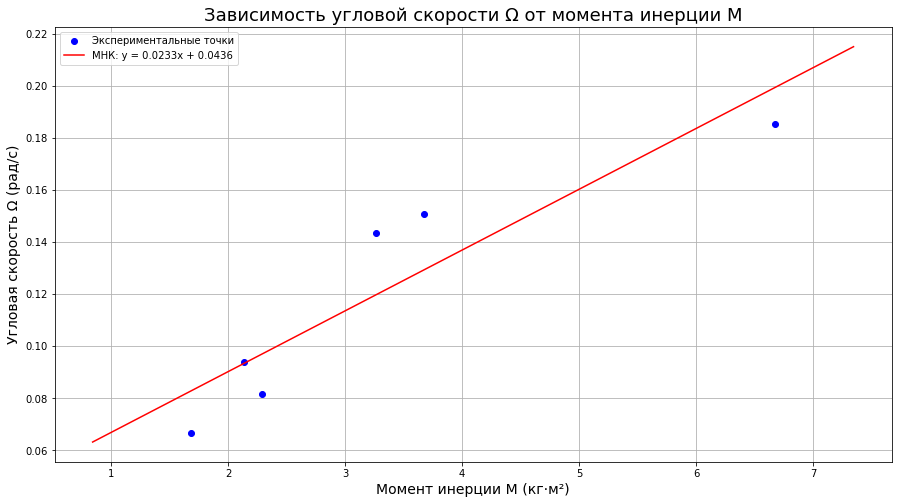

In [17]:
omega_np = np.array(grouped_data.omega)
momentum_np = np.array(grouped_data.momentum)

coefs, cov = np.polyfit(momentum_np, omega_np, 1, cov=True)
sigma_coefs = np.sqrt(np.diag(cov))
slope, intercept = coefs
slope_error, intercept_error = sigma_coefs

x_lsq = np.linspace(momentum_np.min() * 0.5, momentum_np.max() * 1.1, 100)
y_lsq = np.polyval(coefs, x_lsq)

fig = plt.figure(figsize=(15, 8))
plt.scatter(momentum_np, omega_np, color='blue', label='Экспериментальные точки')
plt.plot(x_lsq, y_lsq, color='red', label=f'МНК: y = {slope:.4f}x + {intercept:.4f}')
plt.xlabel('Момент инерции M (кг·м²)', fontsize=14)
plt.ylabel('Угловая скорость Ω (рад/с)', fontsize=14)
plt.title('Зависимость угловой скорости Ω от момента инерции M', fontsize=18)
plt.grid(True)
plt.legend(fontsize=10)
plt.show()

`np.polyfit` также умеет оценивать погрешности! Если точнее, он возвращает матрицу ковариаций для метода наименьших квадратов. Не будем углубляться в математику, главное знать, что на диагонали у неё стоят дисперсии полученных коэффициентов. Для получения собственно погрешности $\sigma$ необходимо взять корень из этих дисперсий.

Также стоит упомянуть про параметр `W`, задающий веса точек для оценки. Если известны ошибки $y_{error}$, можно задать веса как $W = 1 / y_{error}$, и прямая получится ещё более точной. Чтобы учесть ещё и ошибки по $x$, нужны, к сожалению, уже другие методы (но скорее всего, вам не понадобятся даже ошибки по $y$).

Представим, что произошла неприятность, и погрешности возросли в 10 раз!

In [18]:
grouped_data['sigma_omega'] *= 10
grouped_data['momentum'] *= 10



Теперь вам нужно нарисовать график зависимости $\Omega_{down} (M_{down})$ <b>(не $\Omega(M)$!)</b> для точек с крестами погрешностей, а также построить не только прямую по оценке наименьших квадратов, а ещё и учесть погрешности оценок коэффициентов! Т.е. нужно построить три прямых: $k \cdot x + b$, которую выдал МНК, $(k - \sigma_k) \cdot x + (b - \sigma_b)$, $(k + \sigma_k) \cdot x + (b + \sigma_b)$, и закрасить промежуток между этими прямыми (в этом вам поможет функция plt.fill_between). Остальное оформление оставьте таким же, как в предыдущем задании.

_Примечание: часто в МНК не смотрят на погрешность $b$, оставляя только $\sigma_k$._

<center><img src='https://drive.google.com/uc?export=view&id=1SriaMzJah7F610ocIK_O1-HqqtMQgxlg' width=600>

Пример получившегося графика</center>

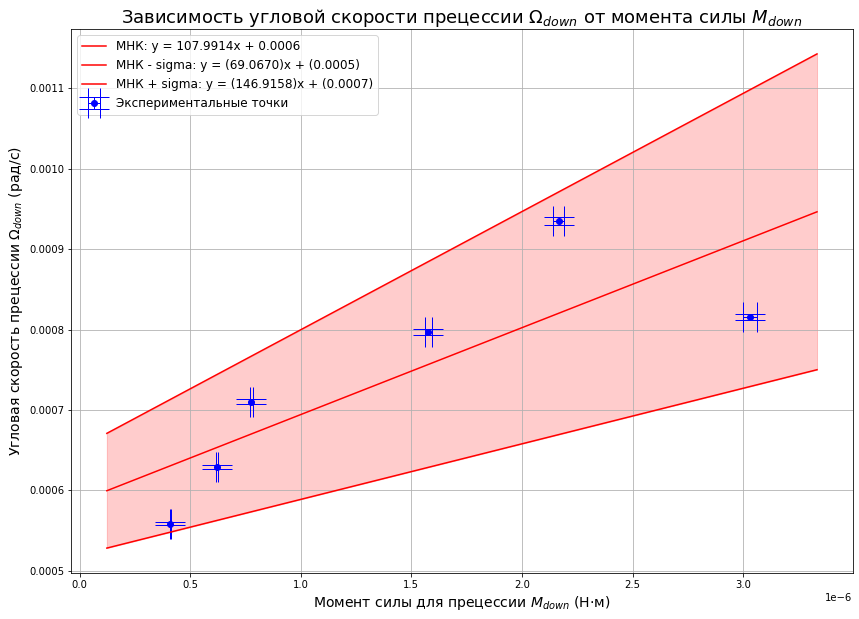

In [30]:
omega_down_np = np.array(grouped_data.omega_down)
momentum_down_np = np.array(grouped_data.momentum_down)
coefs, cov = np.polyfit(momentum_down_np, omega_down_np, 1, cov=True)
x_lsq = np.linspace(momentum_down_np.min() * 0.3, momentum_down_np.max() * 1.1, 100)
lsq_stds = np.sqrt(np.diag(cov))

y_lsq = np.polyval(coefs, x_lsq)
y_lsq_lower = (coefs[0] - lsq_stds[0]) * x_lsq + (coefs[1] - lsq_stds[1])
y_lsq_upper = (coefs[0] + lsq_stds[0]) * x_lsq + (coefs[1] + lsq_stds[1])

fig = plt.figure(figsize=(14, 10))
plt.errorbar(
    momentum_down_np, 
    omega_down_np, 
    xerr=grouped_data['sigma_momentum'], 
    yerr=grouped_data['sigma_down'], 
    fmt='o',
    color='blue', 
    ecolor='blue', 
    capsize=15,
    elinewidth=1,
    label='Экспериментальные точки'
)

plt.plot(
    x_lsq, 
    y_lsq, 
    color='red', 
    label=f'МНК: y = {coefs[0]:.4f}x + {coefs[1]:.4f}'
)

plt.plot(
    x_lsq, 
    y_lsq_lower, 
    color='red', 
    linestyle='-', 
    label=f'МНК - sigma: y = ({coefs[0] - lsq_stds[0]:.4f})x + ({coefs[1] - lsq_stds[1]:.4f})'
)
plt.plot(
    x_lsq, 
    y_lsq_upper, 
    color='red', 
    linestyle='-', 
    label=f'МНК + sigma: y = ({coefs[0] + lsq_stds[0]:.4f})x + ({coefs[1] + lsq_stds[1]:.4f})'
)

plt.fill_between(
    x_lsq, 
    y_lsq_lower, 
    y_lsq_upper, 
    color='red', 
    alpha=0.2
)

plt.xlabel('Момент силы для прецессии $M_{down}$ (Н·м)', fontsize=14)
plt.ylabel('Угловая скорость прецессии $\Omega_{down}$ (рад/с)', fontsize=14)

plt.title('Зависимость угловой скорости прецессии $\Omega_{down}$ от момента силы $M_{down}$', fontsize=18)
plt.grid(True)
plt.legend(fontsize=12)
plt.show()

# 3. Работа с датасетом (3 балла)

Датасет ирисов использовался в статье Р.А. Фишера 1936 года «Использование множественных измерений в таксономических задачах», а в наши дни часто используется начинающими аналитиками данных.

В наборе данных включены три вида ирисов по 50 образцов каждый, а также некоторые свойства каждого цветка. Один вид цветка линейно отделим от двух других, но два других не отделимы линейно друг от друга.

Столбцы в этом датасете:

Идентификатор (Id) \\
Длина чашелистика, см (SepalLengthCm) \\
Ширина чашелистика, см (SepalWidthCm) \\
Длина лепестка, см (PetalLengthCm) \\
Ширина лепестка, см (PetalWidthCm) \\
Вид (Species) \\

<font color='red'>ВНИМАНИЕ!</font> Все графики в этой части должны быть подписаны, а на осях должны быть подписи на русском языке.

In [32]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_style("darkgrid")

In [33]:
iris = pd.read_csv('iris.csv')
iris.head()

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


Давайте проверим, сколько у нас разных видов ирисов в итоге - должно быть 3 по 50 штук каждый. Воспользуйтесь `value_counts` , чтобы посмотреть, какие есть возможные значения у колонки species.

In [36]:
species_counts = iris['variety'].value_counts()
print(species_counts)

Setosa        50
Versicolor    50
Virginica     50
Name: variety, dtype: int64


## 3.1 Графики длины и ширины лепестка ириса

Давайте попробуем сравнить, связаны ли ширина и длина лепестков - воспользуйтесь `sns.scatterplot`, чтобы отобразить на оси OXY значения. Не забудьте подписать график и оси!

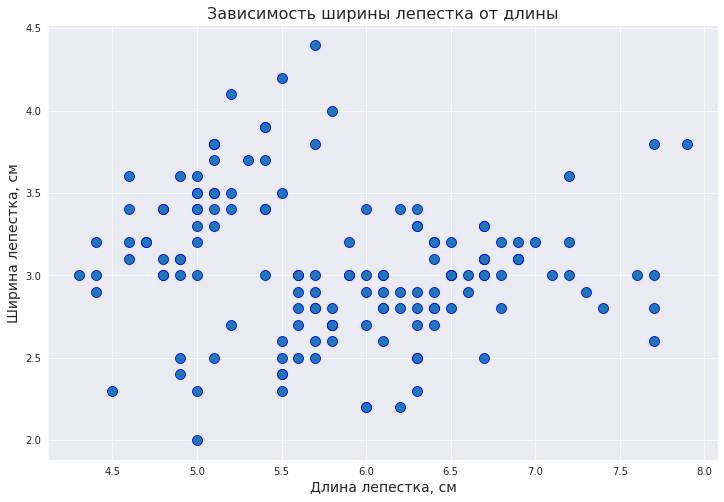

In [40]:
plt.figure(figsize=(12, 8))
sns.scatterplot(data=iris, 
                x='sepal.length', 
                y='sepal.width', 
                s=100,
                edgecolor='b')
plt.title('Зависимость ширины лепестка от длины', fontsize=16)
plt.xlabel('Длина лепестка, см', fontsize=14)
plt.ylabel('Ширина лепестка, см', fontsize=14)
plt.show()

Напишите, какие выводы можно сделать из графика. Чего графику не хватает, чтобы он был информативным?

<font color='blue'>Обычно длина и ширина лепестков имеют положительную связь. Однако графику недостаёт детализации, чтобы показать различия между видами лепестков.</font>

Давайте попробуем другие графики для тех же целей из библиотеки seaborn - `sns.jointplot`; кроме того, попробуйте выделить цветом точки на графике в зависимости от вида ириса - воспользуйтесь `sns.facetgrid`. В следующих ячейках выведите эти два графика и проанализируйте.

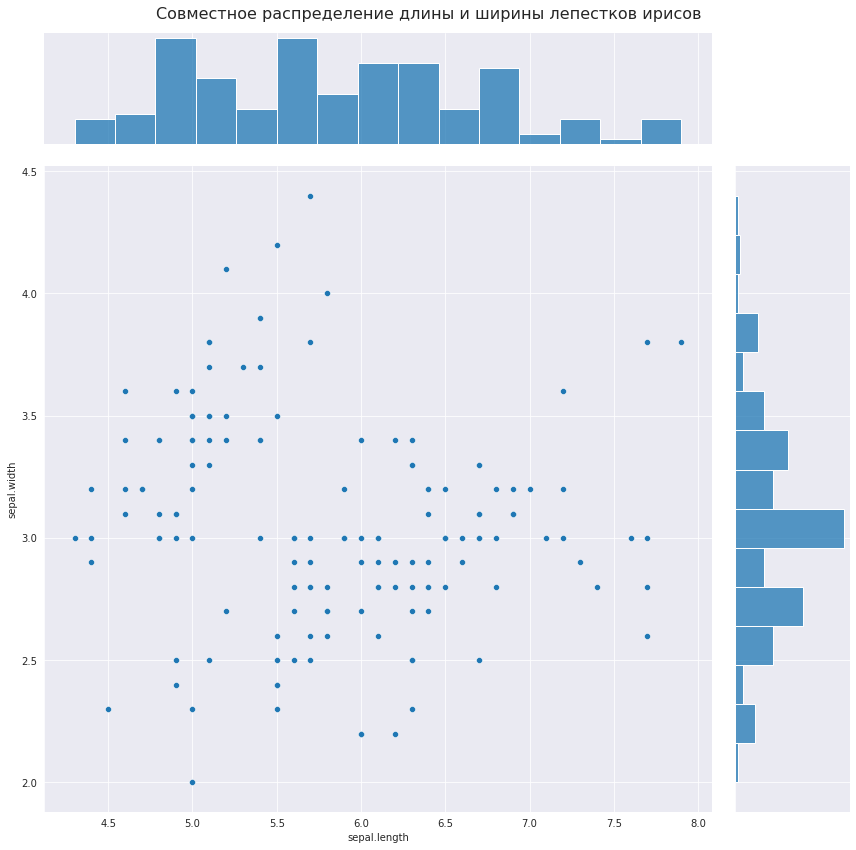

In [41]:
sns.jointplot(
    data=iris,
    x='sepal.length',
    y='sepal.width',
    palette='Set1',
    kind='scatter',
    height=12,
    marginal_kws=dict(bins=15, fill=True)
)
plt.suptitle('Совместное распределение длины и ширины лепестков ирисов', fontsize=16)
plt.subplots_adjust(top=0.95)
plt.xlabel('Длина лепестка, см', fontsize=14)
plt.ylabel('Ширина лепестка, см', fontsize=14)
plt.show()

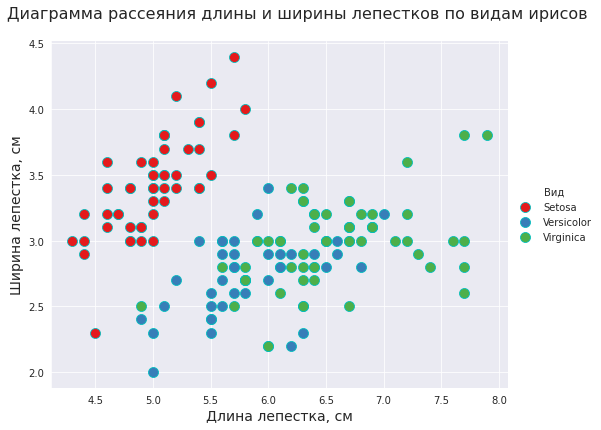

In [45]:
g = sns.FacetGrid(iris, hue='variety', palette='Set1', height=6, aspect=1.2)
g.map(sns.scatterplot, 'sepal.length', 'sepal.width', edgecolor='c', s=100)

plt.subplots_adjust(top=0.9)
g.fig.suptitle('Диаграмма рассеяния длины и ширины лепестков по видам ирисов', fontsize=16)

g.add_legend(title='Вид')
plt.xlabel('Длина лепестка, см', fontsize=14)
plt.ylabel('Ширина лепестка, см', fontsize=14)
plt.show()

Какие выводы можно сделать из этих графиков? Какой из 3 методов - scatterplot, jointplot, facetgrid вам кажется лучше?

<font color='blue'>Каждый график представляет информацию по-разному. Я предпочитаю facetgrid, потому что он позволяет нам увидеть, как изменяются длина и ширина каждого вида по отдельности.</font>

## 3.2 Графики распределений значений длины лепестка

Постройте график "ящика с усами" - `sns.boxplot` и его аналог - `sns.violinplot`. По оси Ox должны находиться возможные виды ирисов, по оси Oy.

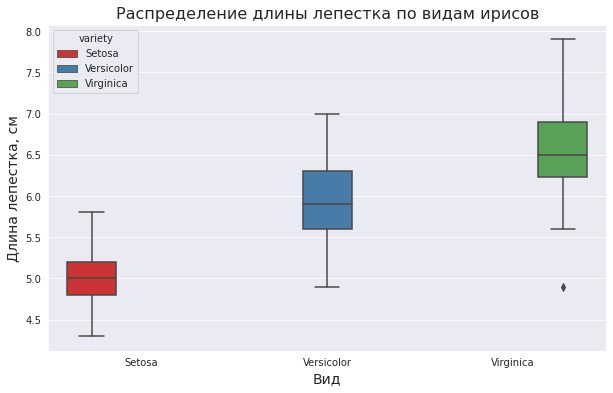

In [46]:
plt.figure(figsize=(10, 6))
sns.boxplot(
    x='variety',
    y='sepal.length',
    data=iris,
    palette='Set1',
    hue = 'variety'
)
plt.title('Распределение длины лепестка по видам ирисов', fontsize=16)
plt.xlabel('Вид', fontsize=14)
plt.ylabel('Длина лепестка, см', fontsize=14)
plt.show()

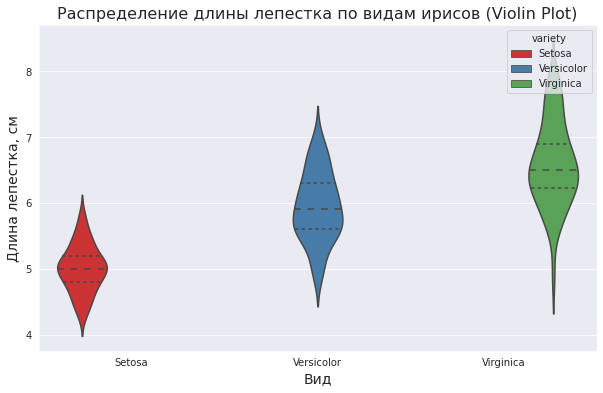

In [47]:
plt.figure(figsize=(10, 6))
sns.violinplot(
    x='variety',
    y='sepal.length',
    data=iris,
    palette='Set1',
    hue = 'variety',
    inner='quartile'
)

plt.title('Распределение длины лепестка по видам ирисов (Violin Plot)', fontsize=16)
plt.xlabel('Вид', fontsize=14)
plt.ylabel('Длина лепестка, см', fontsize=14)
plt.show()

Сравните два вида графиков. Какой более информативный, а какой - более красивый визуально по вашему мнению? Какую информацию мы можем получить из этих графиков?

<font color='blue'> На мой взгляд, оба графика содержат полезную информацию, причём второй выглядит более наглядно. График показывает распределение длины лепестков у разных видов ирисов.
 </font>

## 3.3 Попарные графики взаимосвязи признаков


Давайте попробуем построить большую табличку из графиковв размера 4 на 4, где у нас находятся все возможные пары признаков (длина/ширина лепестка, длина/ширина чашелистика). Для этого воспользуйтесь `sns.pairplot` и не забудьте указать параметр `hue`.

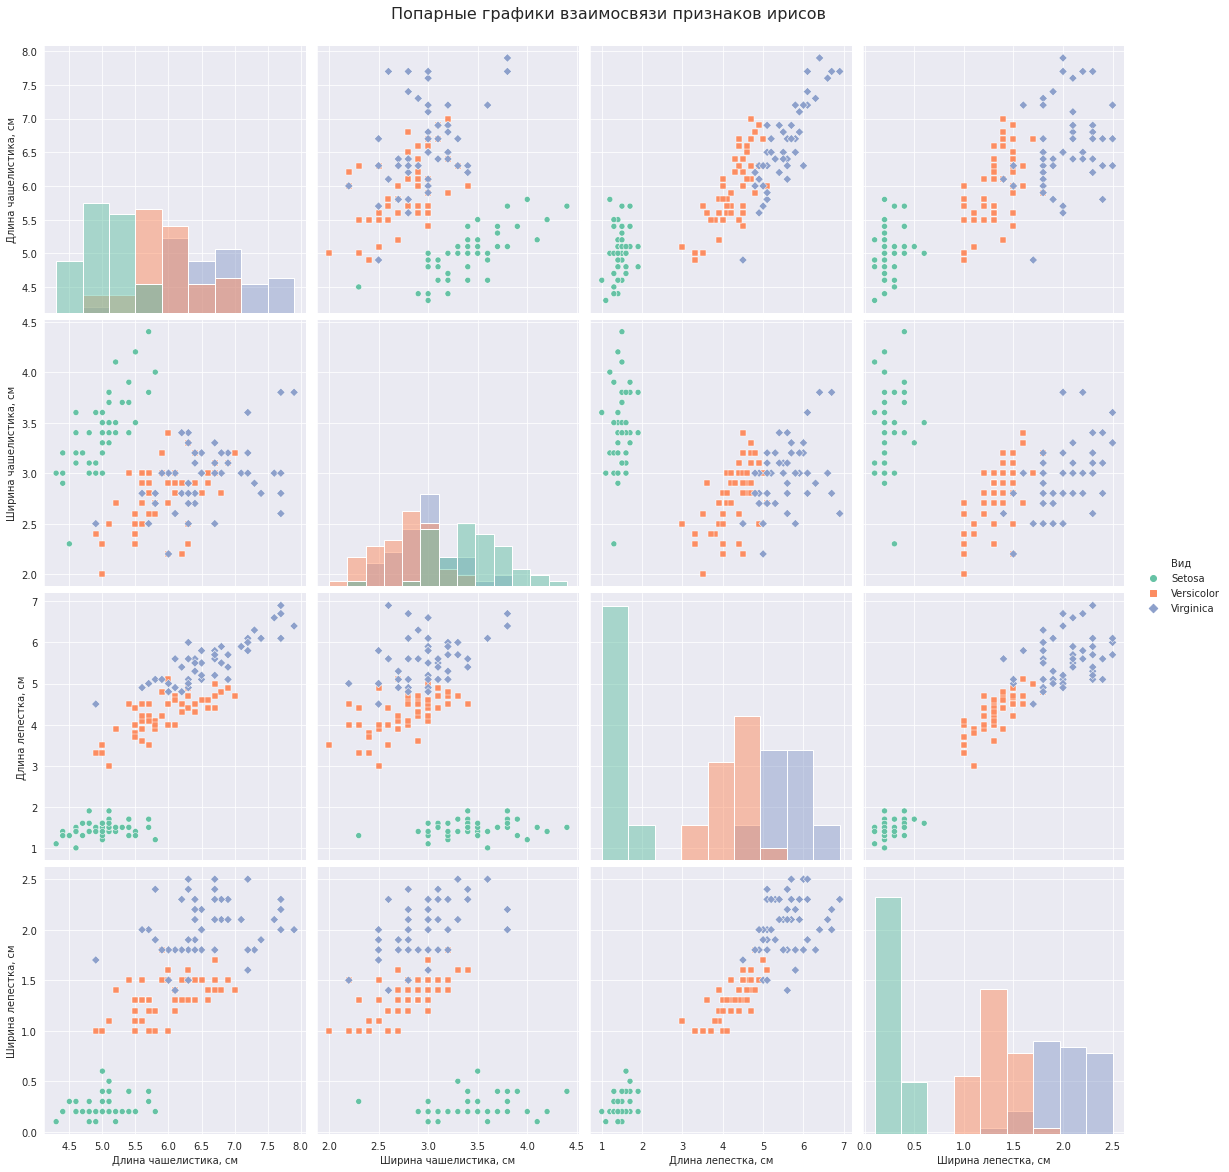

In [51]:
iris.rename(columns={
'sepal.length': 'Длина чашелистика, см',
'sepal.width': 'Ширина чашелистика, см',
'petal.length': 'Длина лепестка, см',
'petal.width': 'Ширина лепестка, см',
'variety': 'Вид'
}, inplace=True) 
pair_plot = sns.pairplot(
    iris,
    hue='Вид',
    palette='Set2',
    height=4,
    diag_kind='hist',
    markers=["o", "s", "D"]
)
plt.suptitle('Попарные графики взаимосвязи признаков ирисов', fontsize=16, y=1.02)
plt.show()

Какую информацию о взаимосвязи признаков вы можете почерпнуть из полученного графика?

<font color='blue'> Влияние различных признаков друг на друга. </font>

Какие графики находятся на диагонали этой таблицы?

<font color='blue'> Гистограммы. </font>

Попробуй заменить графики на диагонали таблицы на другие, возможно, более информативные (подсказка: в документации у `sns.pairplot` для этого есть специальный параметр). Выведи полученный график.

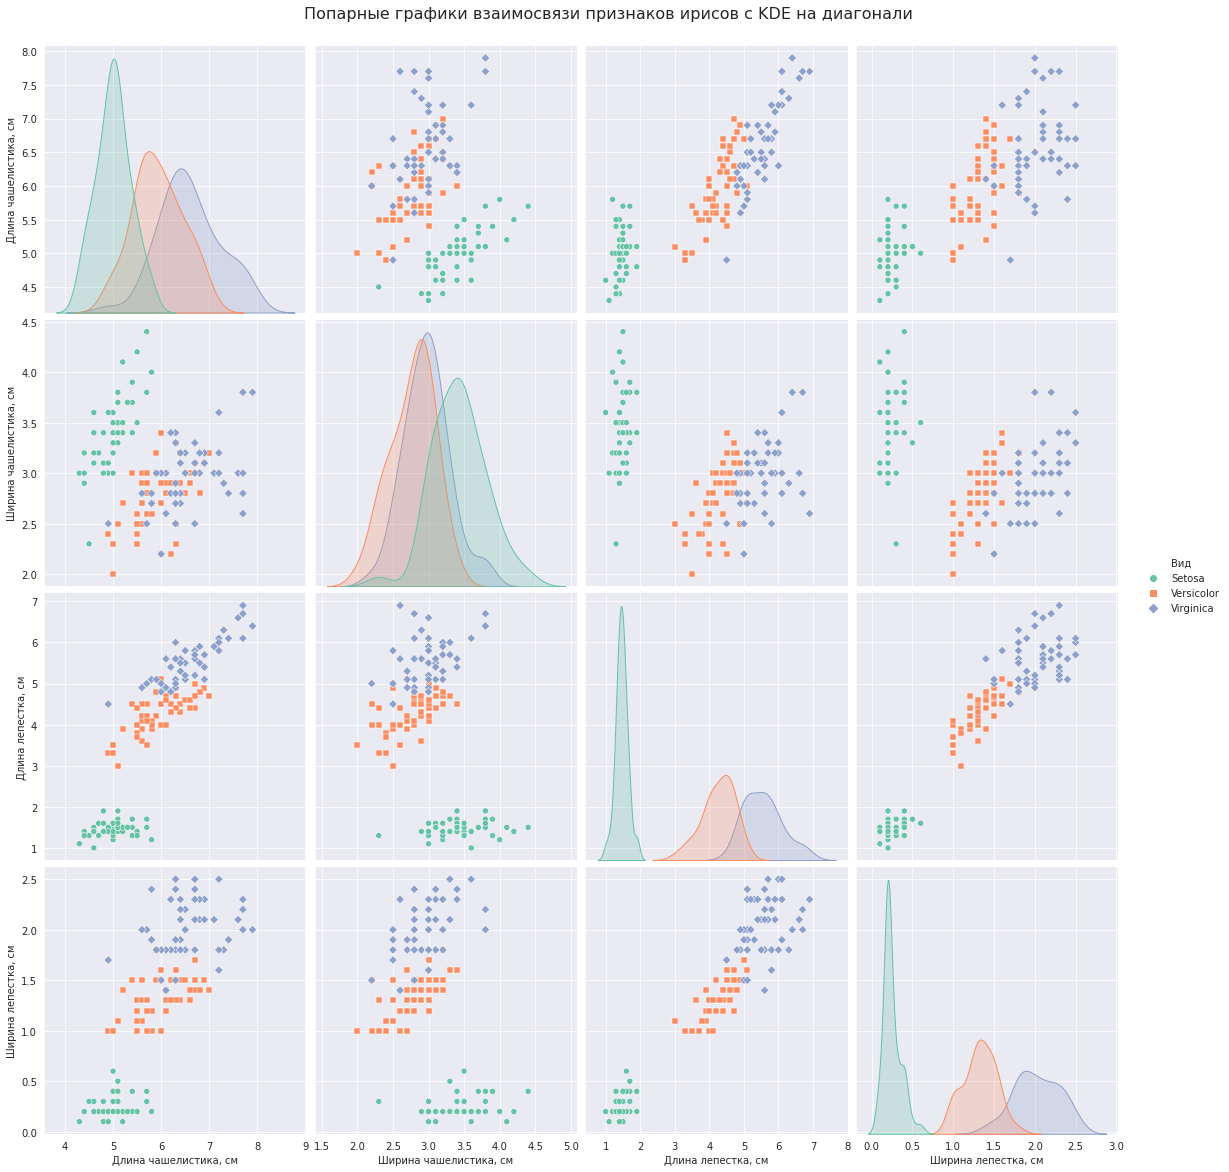

In [52]:
iris.rename(columns={
'sepal.length': 'Длина чашелистика, см',
'sepal.width': 'Ширина чашелистика, см',
'petal.length': 'Длина лепестка, см',
'petal.width': 'Ширина лепестка, см',
'variety': 'Вид'
}, inplace=True) 
pair_plot = sns.pairplot(
    iris,
    hue='Вид',
    palette='Set2',
    height=4,
    diag_kind='kde',
    markers=["o", "s", "D"]
)
plt.suptitle('Попарные графики взаимосвязи признаков ирисов с KDE на диагонали', fontsize=16, y=1.02)
plt.show()

Какие графики теперь находятся на диагонали таблицы? Получилось ли более информативно?

<font color='blue'> KDE (Kernel Density Estimation) графики. Да. </font>